Create a Class for applying different clustering techniques

- KMeans
- DBSCAN
- Gaussian Mixture Models

In [1]:
from utils import load_display_options, ignore_warnings
load_display_options()
ignore_warnings()

In [2]:
import pandas as pd
import seaborn as sns
from clustering.clustering import kmeans, dbscan, GMM
from visualisation.plotting_clusters import plot_clusters_pitch, plot_clusters_pitch_grid, plot_arrows_clusters_pitch_grid

from visualisation.visualise import load_fonts, load_mpl_style
visualisation_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation"
font_path = visualisation_path + "/fonts"
style_path = visualisation_path + "/mplstyle/lilac_pitch_clusters.mplstyle"

load_fonts(font_path)
load_mpl_style(style_path)


Bad key ines.linestyle in file /Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation/mplstyle/lilac_pitch_clusters.mplstyle, line 16 ('ines.linestyle: -                 # solid line')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
colour_cycle = sns.set_palette("magma", 10)

Load Chain Data

In [4]:
chains = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_chains_v2.csv")
chains['Season'] = chains['Round_ID'].apply(lambda x: int(str(x)[:4]))
chains_2023 = chains[chains['Season'] == 2023]
chains_2023.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season,Goal,Behind,Miss,Score,Event_Type1,ballUp,centreBounce,kickIn,possGain,throwIn,Event_Type0,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Time_Since_Last_Action,Distance_Since_Last_Action,Chain_Duration,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore,action_type,Contested,Mark,Free,From_Centre_Bounce,Kick_Inside50,To_Ball_Up,From_Ball_Up,Rushed_Behind,Contest_Target,To_Out_On_Full,From_Out_On_Full,Error,From_Kick_In,end_x,end_y,pitch_start_x,pitch_start_y,pitch_end_x,pitch_end_y,left_right_start_x,left_right_start_y,left_right_end_x,left_right_end_y,start_distance_to_right_goal,end_distance_to_right_goal,Inside50,1,2,3,4,Duration,match_id,chain_number,order,quarter,quarter_seconds,overall_seconds,team,player,contested,mark,outcome_type,type_Kick_a0,type_Handball_a0,type_Carry_a0,type_Spoil_a0,outcome_effective_a0,outcome_ineffective_a0,outcome_clanger_a0,type_Kick_outcome_effective_a0,type_Kick_outcome_ineffective_a0,type_Kick_outcome_clanger_a0,type_Handball_outcome_effective_a0,type_Handball_outcome_ineffective_a0,type_Handball_outcome_clanger_a0,type_Carry_outcome_effective_a0,type_Carry_outcome_ineffective_a0,type_Carry_outcome_clanger_a0,type_Spoil_outcome_effective_a0,type_Spoil_outcome_ineffective_a0,type_Spoil_outcome_clanger_a0,quarter_a0,quarter_seconds_a0,overall_seconds_a0,left_right_start_x_a0,left_right_start_y_a0,left_right_end_x_a0,left_right_end_y_a0,dx_a0,dy_a0,movement_a0,contested_a0,mark_a0,type_Kick_a1,type_Handball_a1,type_Carry_a1,type_Spoil_a1,outcome_effective_a1,outcome_ineffective_a1,outcome_clanger_a1,type_Kick_outcome_effective_a1,type_Kick_outcome_ineffective_a1,type_Kick_outcome_clanger_a1,type_Handball_outcome_effective_a1,type_Handball_outcome_ineffective_a1,type_Handball_outcome_clanger_a1,type_Carry_outcome_effective_a1,type_Carry_outcome_ineffective_a1,type_Carry_outcome_clanger_a1,type_Spoil_outcome_effective_a1,type_Spoil_outcome_ineffective_a1,type_Spoil_outcome_clanger_a1,quarter_a1,quarter_seconds_a1,overall_seconds_a1,left_right_start_x_a1,left_right_start_y_a1,left_right_end_x_a1,left_right_end_y_a1,dx_a1,dy_a1,movement_a1,contested_a1,mark_a1,type_Kick_a2,type_Handball_a2,type_Carry_a2,type_Spoil_a2,outcome_effective_a2,outcome_ineffective_a2,outcome_clanger_a2,type_Kick_outcome_effective_a2,type_Kick_outcome_ineffective_a2,type_Kick_outcome_clanger_a2,type_Handball_outcome_effective_a2,type_Handball_outcome_ineffective_a2,type_Handball_outcome_clanger_a2,type_Carry_outcome_effective_a2,type_Carry_outcome_ineffective_a2,type_Carry_outcome_clanger_a2,type_Spoil_outcome_effective_a2,type_Spoil_outcome_ineffective_a2,type_Spoil_outcome_clanger_a2,quarter_a2,quarter_seconds_a2,overall_seconds_a2,left_right_start_x_a2,left_right_start_y_a2,left_right_end_x_a2,left_right_end_y_a2,dx_a2,dy_a2,movement_a2,contested_a2,mark_a2,team_1,team_2,time_delta1,time_delta2,dx_a01,dy_a01,move_a01,dx_a02,dy_a02,move_a02,goalscore_team,goalscore_opponent,goalscore_diff,exp_scores_label,exp_concedes_label,exp_scores,exp_concedes,exp_offensive_value,exp_defensive_value,exp_vaep_value,Disposal_Response,xDisposal
957691,240,ballUp,miss,1849.0,4,1755,1788.0,Collingwood,Collingwood,Brody Mihocek,Brody_Mihocek,Kick,-49.0,-48.0,effective,NaN,NaN,141,160,Collingwood,Brisbane Lions,right,2023F4_Collingwood_BrisbaneLions,2023F4,NaN,2023,NaN,NaN,0,0,Un

Filtered Data

In [5]:
goals = chains_2023[chains_2023['Goal'] == 1]

K-Means

In [6]:
goals['kmeans_9'] = kmeans(9, goals[['left_right_start_x', 'left_right_start_y']])

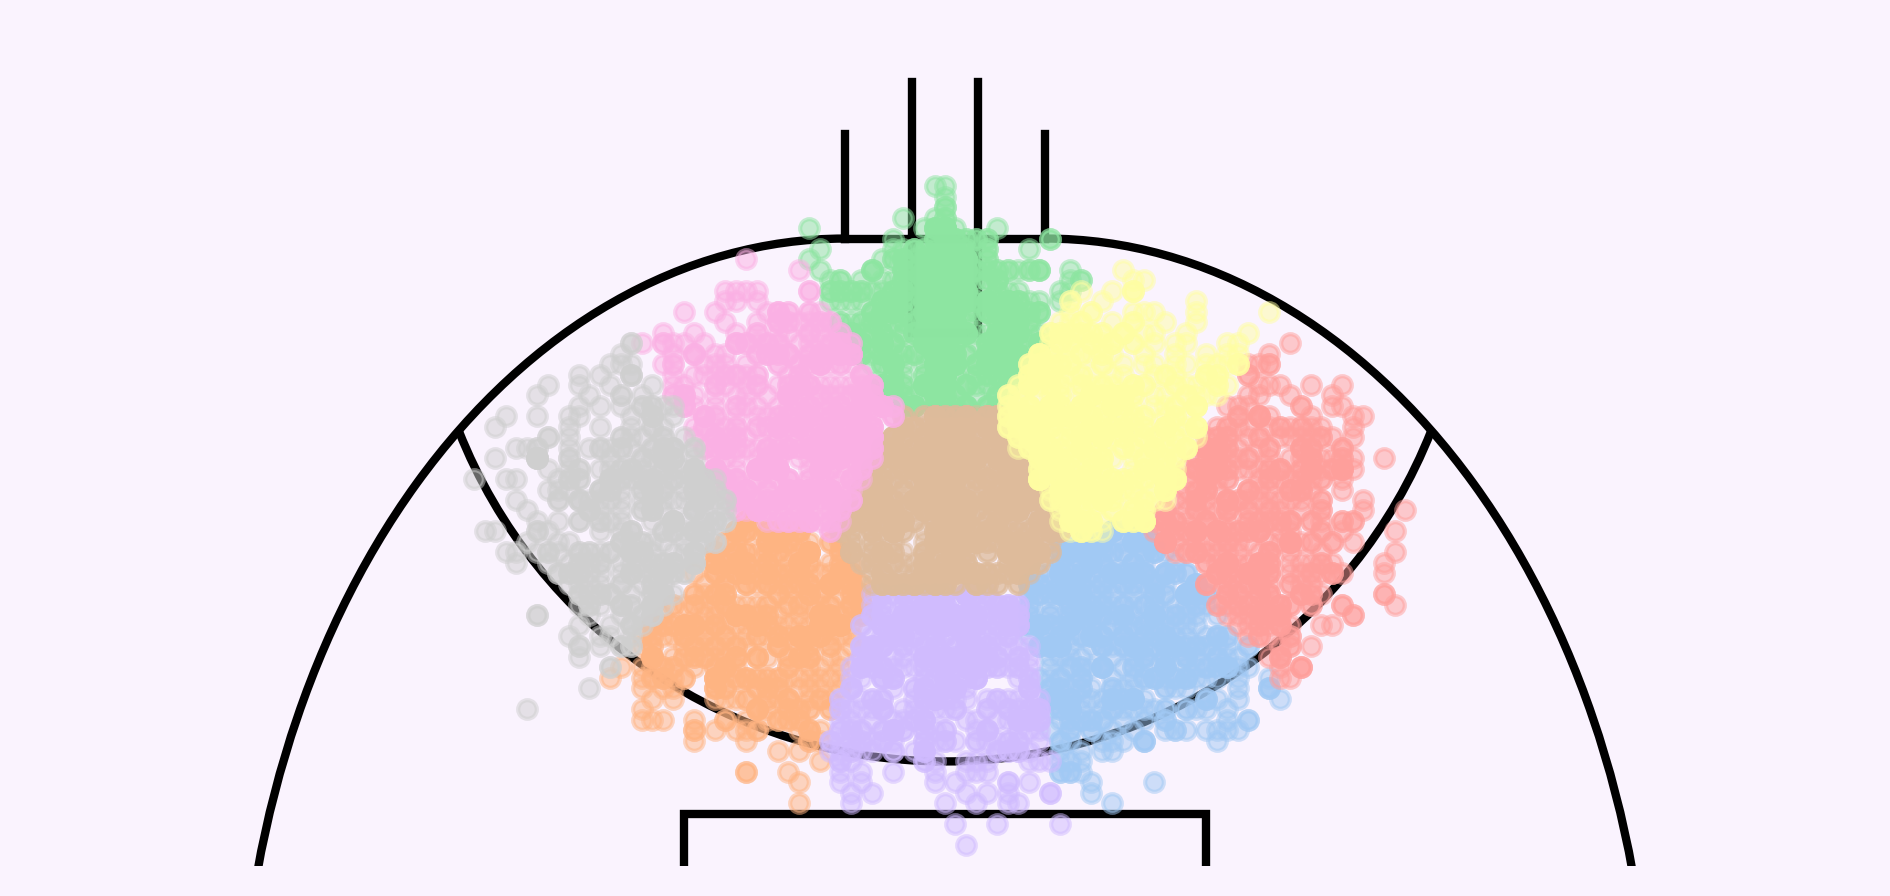

In [7]:
fig, ax = plot_clusters_pitch(k=9, data=goals, x='left_right_start_x', y='left_right_start_y',
                              colour_cycle=sns.color_palette("pastel", 9),
                              label='kmeans_9', vertical = True, half=True)

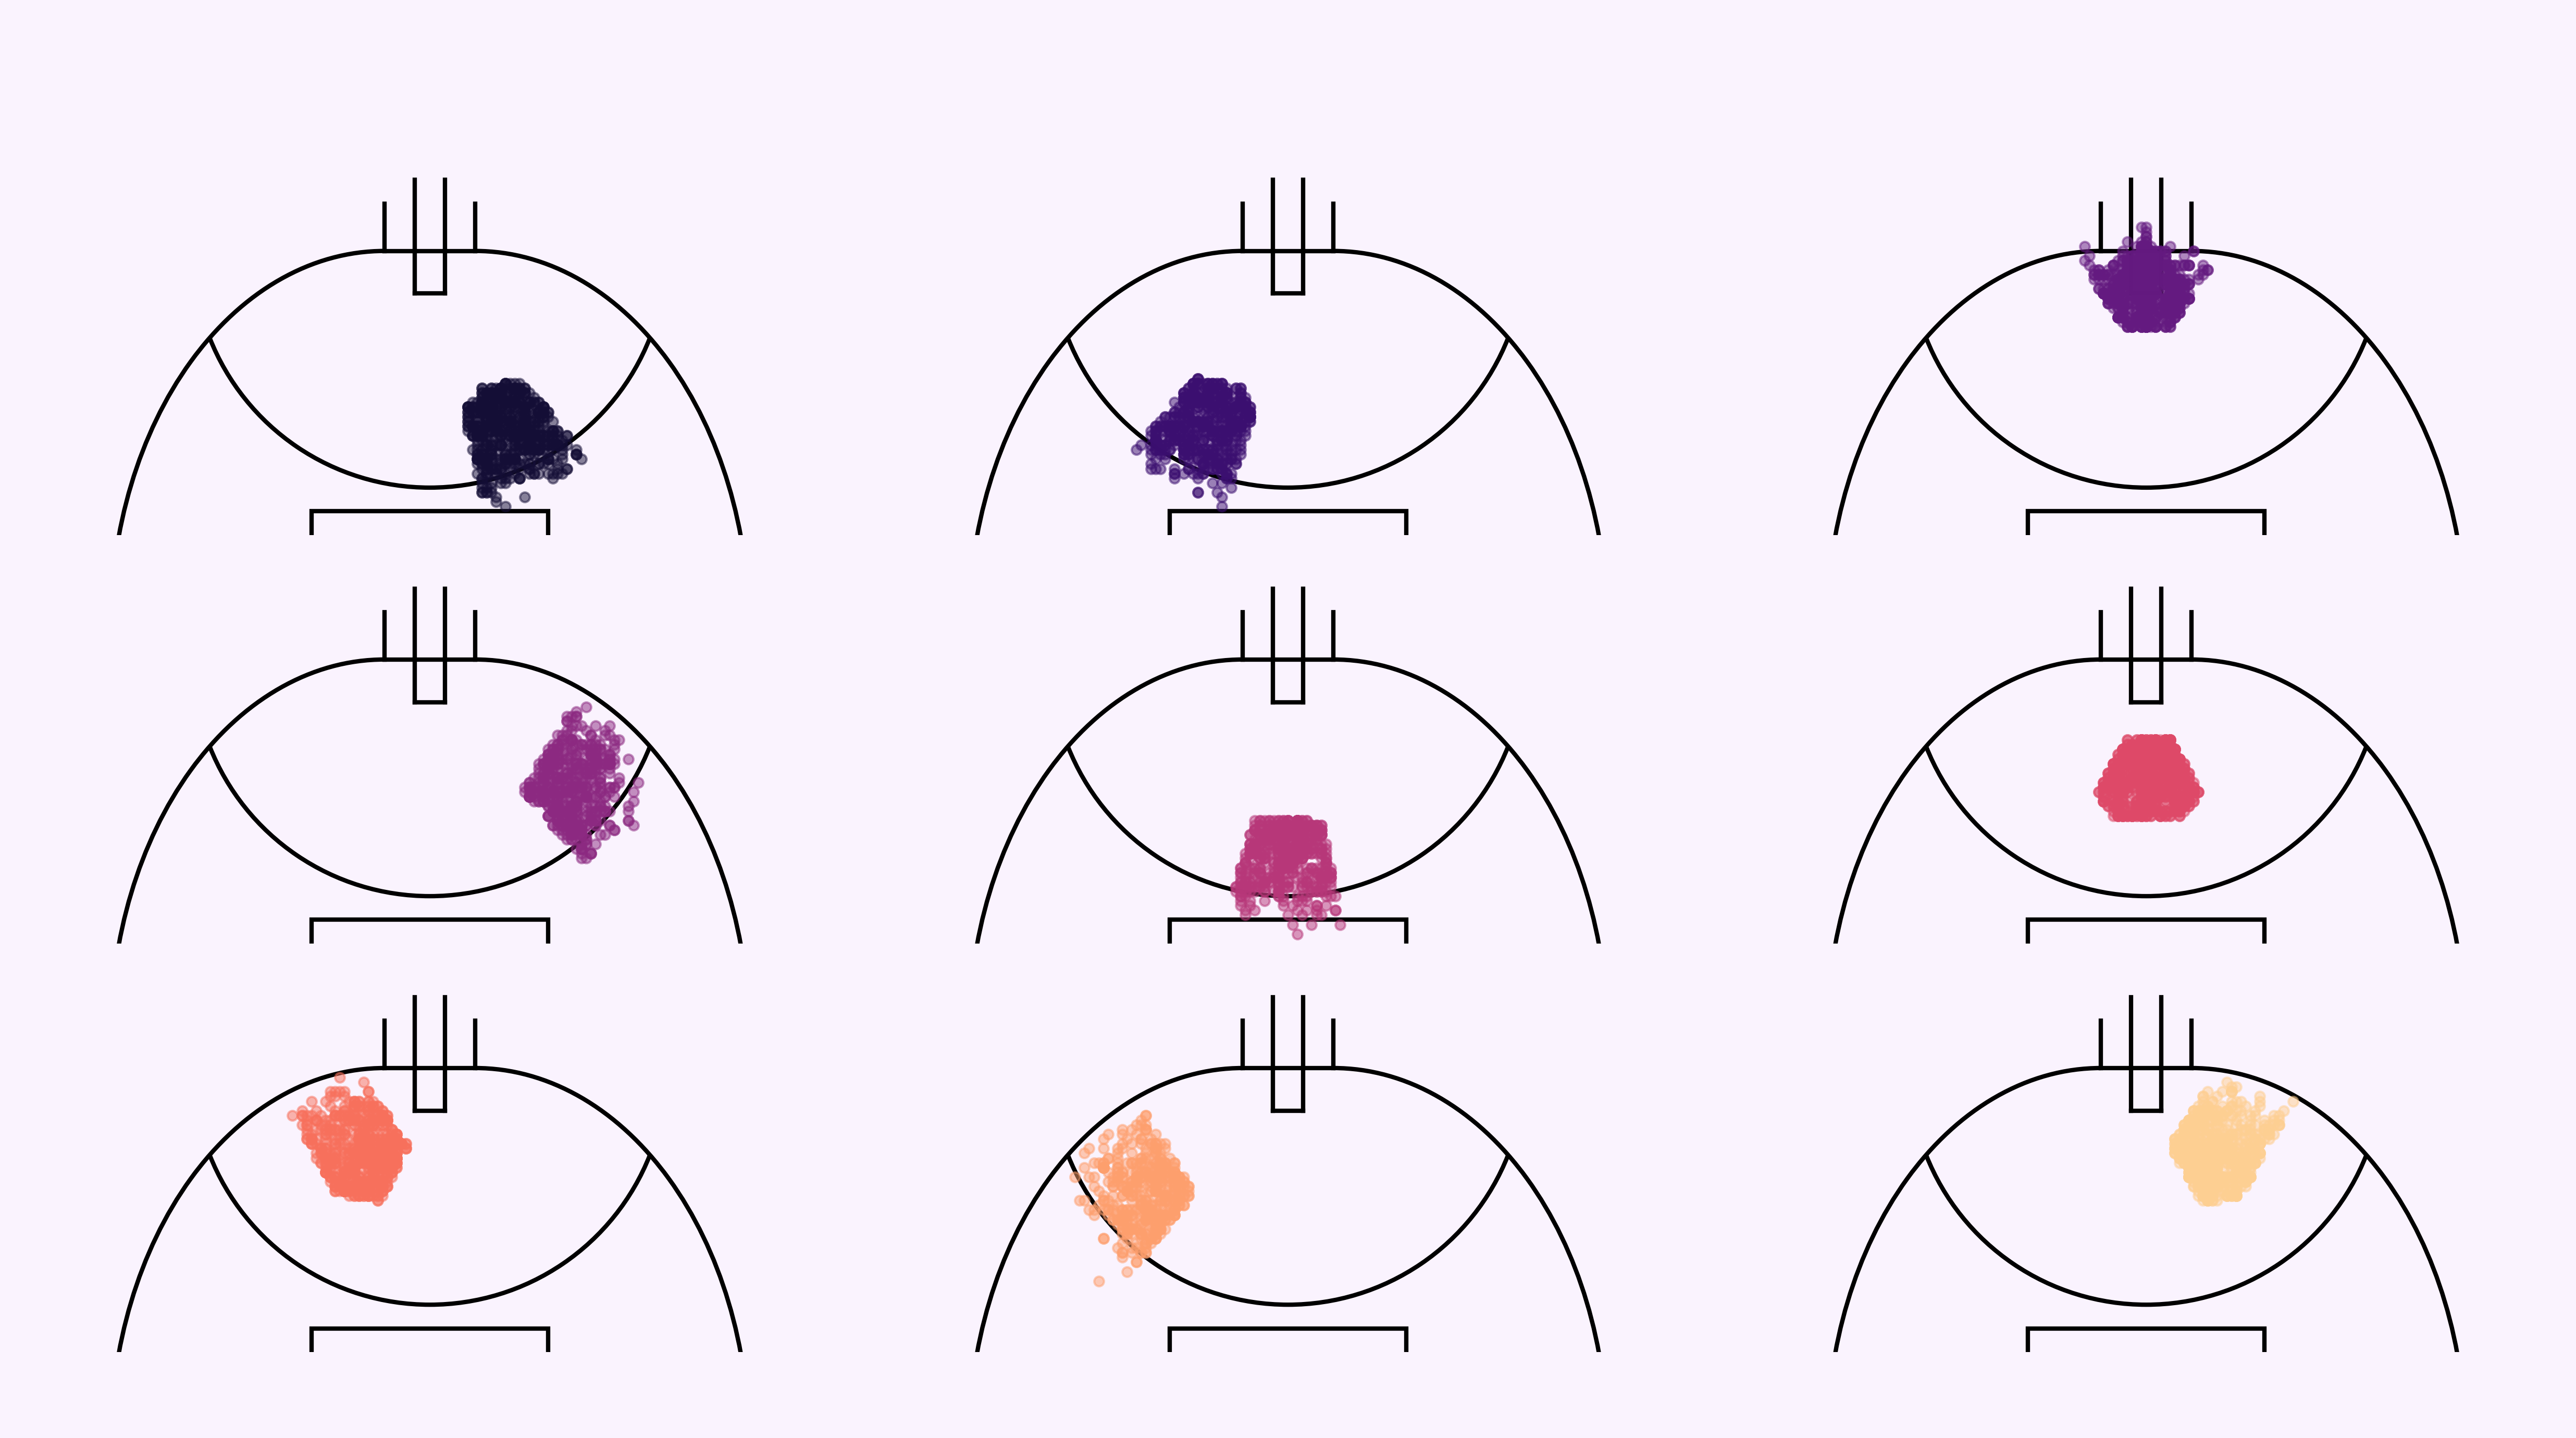

In [8]:
fig, axs = plot_clusters_pitch_grid(k=9, data=goals, x='left_right_start_x', y='left_right_start_y',
                                    colour_cycle=sns.color_palette("magma", 9),
                                    label='kmeans_9', vertical = True, half=True)

DBSCAN

In [9]:
goals['dbscan_2'] = dbscan(eps=2, min_samples=25, data=goals[['left_right_start_x', 'left_right_start_y']])
num_clusters = len(goals['dbscan_2'].unique())

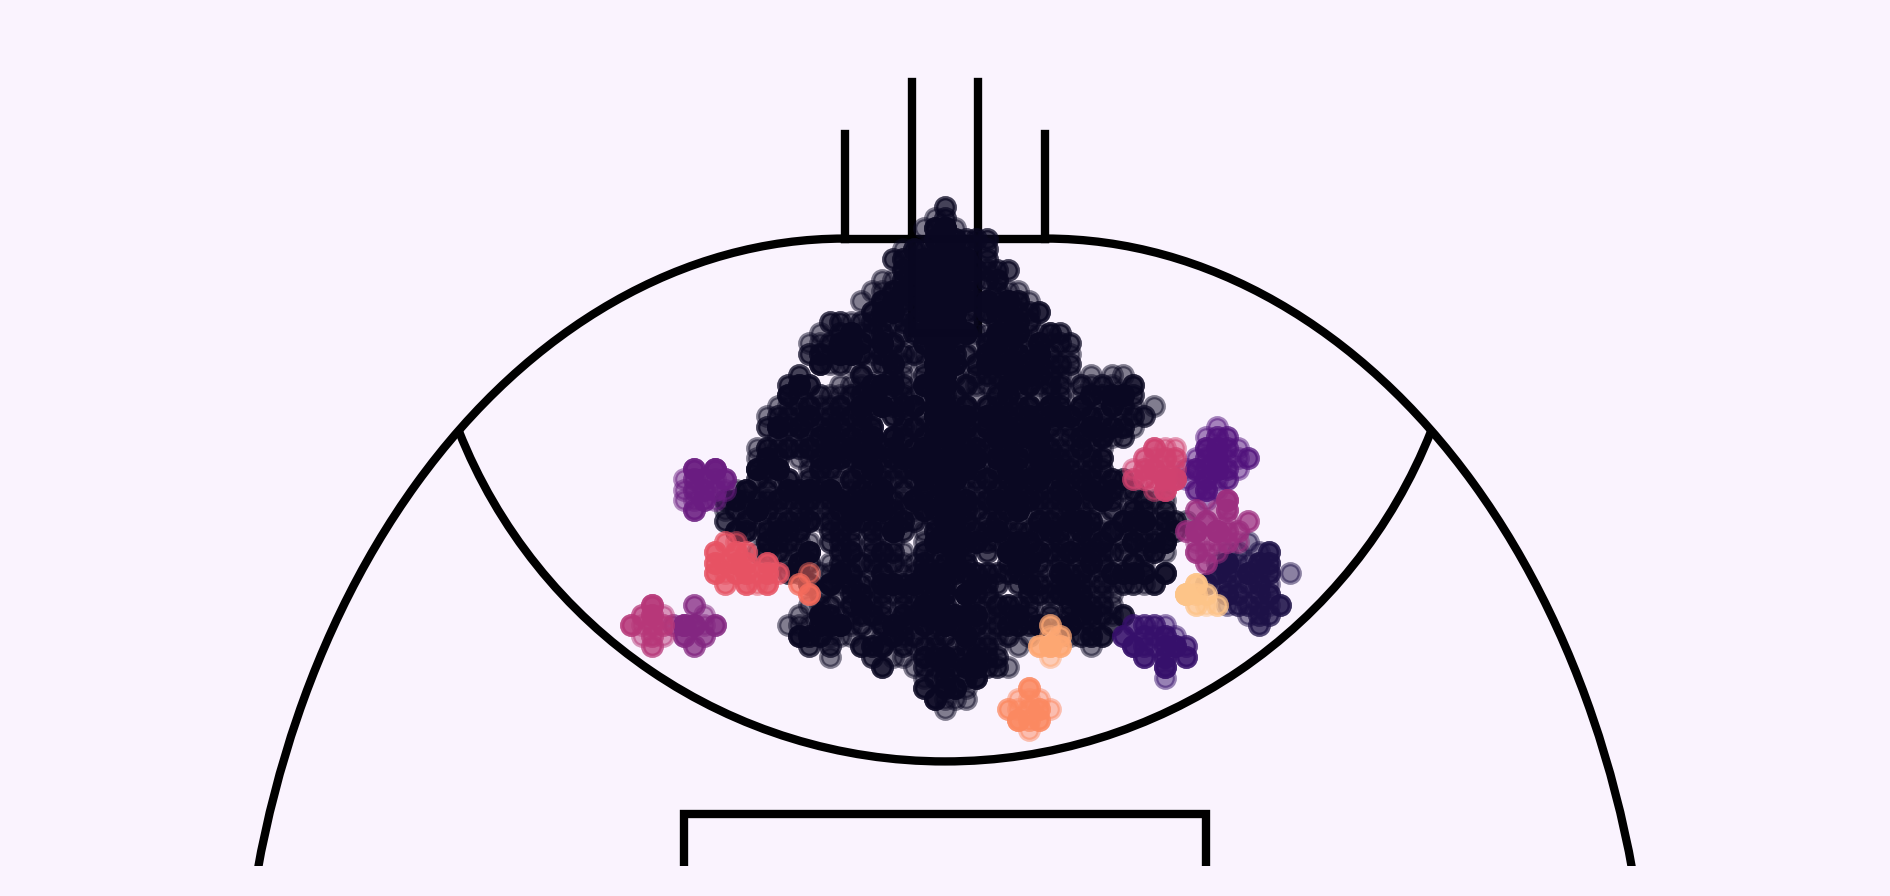

In [10]:
fig, axs = plot_clusters_pitch(k=num_clusters, data=goals, x='left_right_start_x', y='left_right_start_y',
                                    colour_cycle=sns.color_palette("magma", num_clusters),
                                    label='dbscan_2', vertical = True, half=True)

Gaussian Mixture Model

In [11]:
clusters = 9
goals['GMM_9'] = GMM(clusters=clusters, data=goals[['left_right_start_x', 'left_right_start_y']])

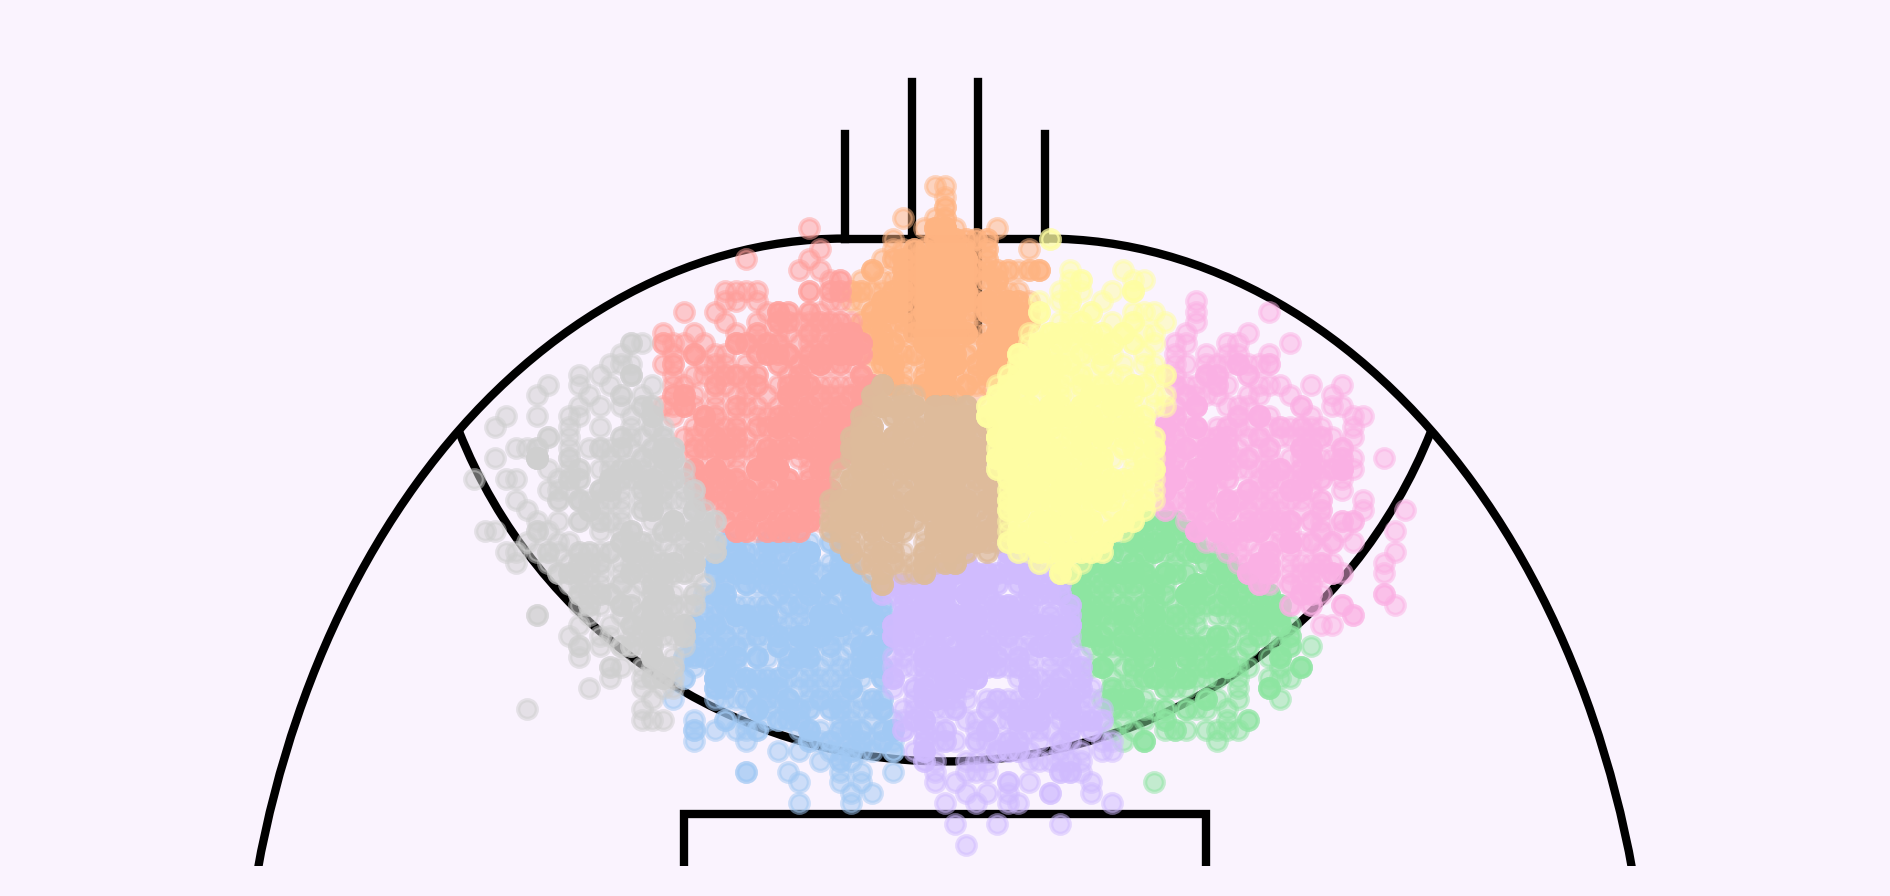

In [12]:
fig, axs = plot_clusters_pitch(k=clusters, data=goals, x='left_right_start_x', y='left_right_start_y',
                               colour_cycle=sns.color_palette("pastel", clusters),
                               label='GMM_9', vertical = True, half=True)